In [1]:
import pandas as pd
df = pd.read_csv('organic.csv')
df

,Compound,log(Kow),EHOMO,Q-,ELUMO,Q+,Class
0,methanol,-0.77,-11.135,-0.5353,3.7775,0.3182,1
1,ethanol,-0.31,-11.050,-0.5360,3.6513,0.3107,1
2,1-propanol,0.25,-10.940,-0.5317,3.6324,0.3122,1
3,2-propanol,0.05,-10.895,-0.5469,3.4925,0.3166,1
4,1-butanol,0.88,-10.940,-0.5422,3.5041,0.3141,1
...,...,...,...,...,...,...,...
185,2-nitroaniline,1.85,-9.068,-0.6488,-0.7937,0.3510,2
186,3-nitroaniline,1.37,-9.254,-0.9468,-0.9503,0.3922,2
187,4-nitroaniline,1.39,-9.160,-0.6493,0.7050,0.3134,2
188,2-chloro-4-nitroaniline,2.06,-9.256,-0.6434,-0.9066,0.3183,2


In [2]:
df['Gap'] = df['ELUMO'] - df['EHOMO']
df

,Compound,log(Kow),EHOMO,Q-,ELUMO,Q+,Class,Gap
0,methanol,-0.77,-11.135,-0.5353,3.7775,0.3182,1,14.9125
1,ethanol,-0.31,-11.050,-0.5360,3.6513,0.3107,1,14.7013
2,1-propanol,0.25,-10.940,-0.5317,3.6324,0.3122,1,14.5724
3,2-propanol,0.05,-10.895,-0.5469,3.4925,0.3166,1,14.3875
4,1-butanol,0.88,-10.940,-0.5422,3.5041,0.3141,1,14.4441
...,...,...,...,...,...,...,...,...
185,2-nitroaniline,1.85,-9.068,-0.6488,-0.7937,0.3510,2,8.2743
186,3-nitroaniline,1.37,-9.254,-0.9468,-0.9503,0.3922,2,8.3037
187,4-nitroaniline,1.39,-9.160,-0.6493,0.7050,0.3134,2,9.8650
188,2-chloro-4-nitroaniline,2.06,-9.256,-0.6434,-0.9066,0.3183,2,8.3494


In [3]:
X = df[['Q-', 'Gap']].values
y = df['Class'].values

In [4]:
X.shape, y.shape

((190, 2), (190,))

In [5]:
from sklearn import tree

clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(X, y)

DecisionTreeClassifier()

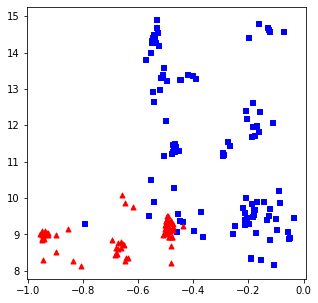

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize = (5, 5))
x1 = df.iloc[:114, 3]
y1 = df.iloc[:114, 7]
x2 = df.iloc[114:, 3]
y2 = df.iloc[114:, 7]

plt.scatter(x1, y1, c = 'b', marker = 's', s = 25)
plt.scatter(x2, y2, c = 'r', marker = '^', s = 25)
plt.show()

In [7]:
import numpy as np
xx, yy = np.meshgrid(np.arange(-1.0, 0.1, 0.01), np.arange(8, 15.2, 0.01))
xx, yy

(array([[-1.  , -0.99, -0.98, ...,  0.07,  0.08,  0.09],
        [-1.  , -0.99, -0.98, ...,  0.07,  0.08,  0.09],
        [-1.  , -0.99, -0.98, ...,  0.07,  0.08,  0.09],
        ...,
        [-1.  , -0.99, -0.98, ...,  0.07,  0.08,  0.09],
        [-1.  , -0.99, -0.98, ...,  0.07,  0.08,  0.09],
        [-1.  , -0.99, -0.98, ...,  0.07,  0.08,  0.09]]),
 array([[ 8.  ,  8.  ,  8.  , ...,  8.  ,  8.  ,  8.  ],
        [ 8.01,  8.01,  8.01, ...,  8.01,  8.01,  8.01],
        [ 8.02,  8.02,  8.02, ...,  8.02,  8.02,  8.02],
        ...,
        [15.17, 15.17, 15.17, ..., 15.17, 15.17, 15.17],
        [15.18, 15.18, 15.18, ..., 15.18, 15.18, 15.18],
        [15.19, 15.19, 15.19, ..., 15.19, 15.19, 15.19]]))

In [8]:
coords = np.stack((xx.reshape(-1), yy.reshape(-1)), axis = 1)
coords

array([[-1.  ,  8.  ],
       [-0.99,  8.  ],
       [-0.98,  8.  ],
       ...,
       [ 0.07, 15.19],
       [ 0.08, 15.19],
       [ 0.09, 15.19]])

In [9]:
Z = clf_tree.predict(coords)
Z = Z.reshape(xx.shape)
Z.shape

(720, 110)

C:\Users\zhong\AppData\Local\Temp/ipykernel_13048/2761486403.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap = light_rgb)


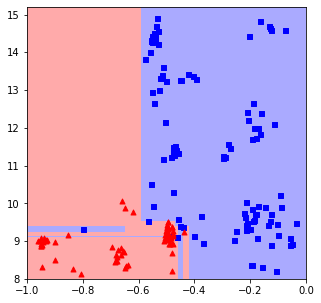

In [10]:
from matplotlib.colors import ListedColormap

light_rgb = ListedColormap(['#AAAAFF', '#FFAAAA'])
plt.figure(figsize = (5, 5))
plt.pcolormesh(xx, yy, Z, cmap = light_rgb)
plt.scatter(x1, y1, c = 'b', marker = 's', s = 25)
plt.scatter(x2, y2, c = 'r', marker = '^', s = 25)
plt.xlim(-1.0, 0.00)
plt.ylim(8, 15.2)
plt.show()

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [12]:
clf_svm = make_pipeline(StandardScaler(), SVC(kernel = "linear"))
clf_svm.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [13]:
Z = clf_svm.predict(coords)
Z = Z.reshape(xx.shape)

C:\Users\zhong\AppData\Local\Temp/ipykernel_13048/753435471.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap = light_rgb)


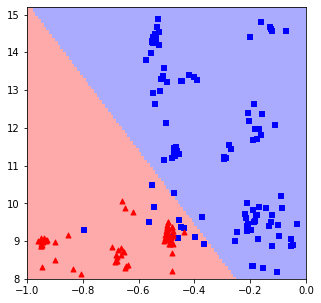

In [14]:
light_rgb = ListedColormap(['#AAAAFF', '#FFAAAA'])
plt.figure(figsize = (5, 5))
plt.pcolormesh(xx, yy, Z, cmap = light_rgb)
plt.scatter(x1, y1, c = 'b', marker = 's', s = 25)
plt.scatter(x2, y2, c = 'r', marker = '^', s = 25)
plt.xlim(-1.0, 0.00)
plt.ylim(8, 15.2)
plt.show()